# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey
# **Actividad Regresiones**
#### Josías Ruiz - A00968460
##### Dr. María de La Paz Rico

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

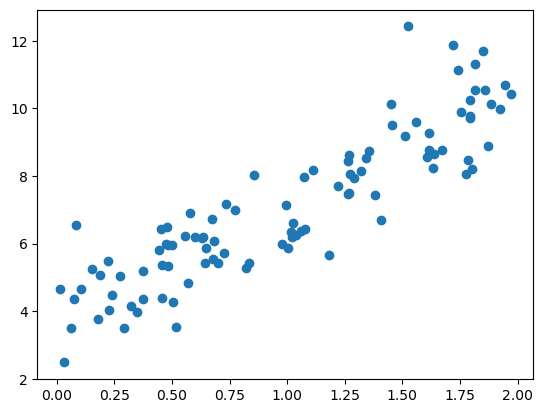

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [6]:
#X_fit[]

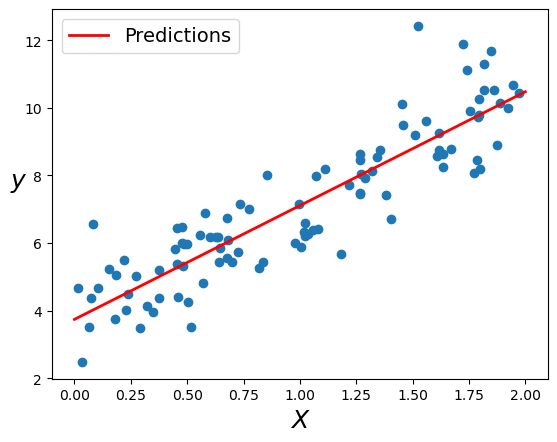

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [12]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [13]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

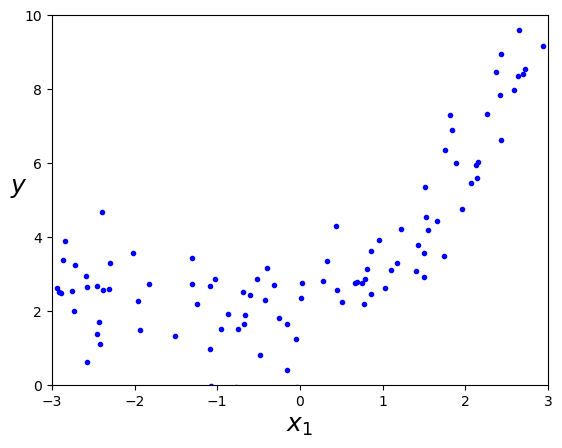

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [18]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [19]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [20]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

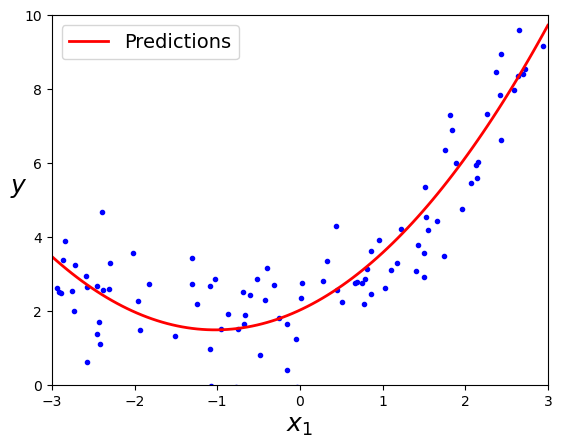

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


In [22]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error,  make_scorer, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

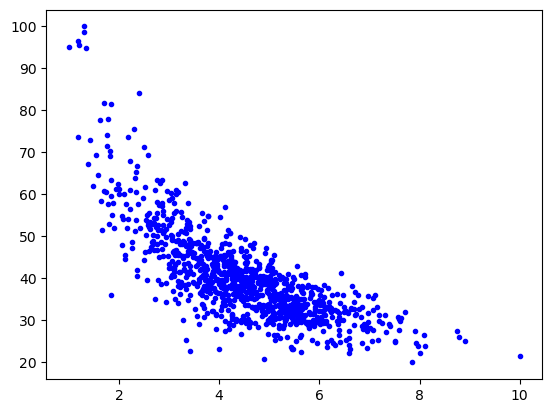

In [27]:
plt.plot(X,y,'b.')

In [28]:
#-------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
Model_Indicators =[]

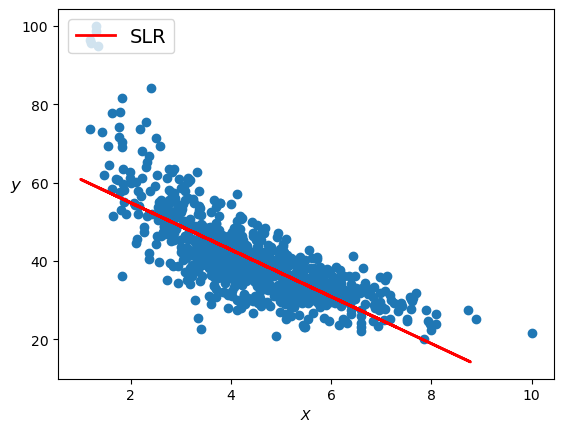

In [29]:
#lineal

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

X_Lineal = X_test
y_Lineal = linear_reg.predict(X_Lineal)

plt.scatter(X_train, y_train)
plt.plot(X_Lineal, y_Lineal, "r-", linewidth=2, label="SLR")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=14);

In [30]:
# Ecuación del modelo
print('SLR Eq: y =', linear_reg.coef_,'x +', linear_reg.intercept_)

SLR Eq: y = [-5.98882699] x + 66.83650741226988


In [31]:
MAE_SLR = mean_absolute_error(y_test,y_Lineal)
Model_Indicators.append(["SLR","MAE",MAE_SLR])

RMSE_SLR = mean_squared_error(y_test,y_Lineal)
Model_Indicators.append(["SLR","RMSE",RMSE_SLR])

r2_SLR = r2_score(y_test,y_Lineal)
Model_Indicators.append(["SLR","r2",r2_SLR])

print('Error Medio Absoluto (MAE):', MAE_SLR)
print('Error Medio Cuadrado (RMSE):', RMSE_SLR)
print('r2:', r2_SLR)

Error Medio Absoluto (MAE): 5.013587781954963
Error Medio Cuadrado (RMSE): 50.53735951137563
r2: 0.6116251549562579


In [32]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

print("Input",poly_features.n_input_features_)
print("Ouput",poly_features.n_output_features_)
print("Powersn",poly_features.powers_)

PLR = LinearRegression(fit_intercept=True)
PLR.fit(X_poly, y_train)
PLR.coef_, PLR.intercept_


Input 1
Ouput 2
Powersn [[1]
 [2]]


C:\Users\josia\anaconda3\envs\MNA\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [33]:
X_Poly = poly_features.fit_transform(X_test)
y_Poly = PLR.predict(X_Poly)

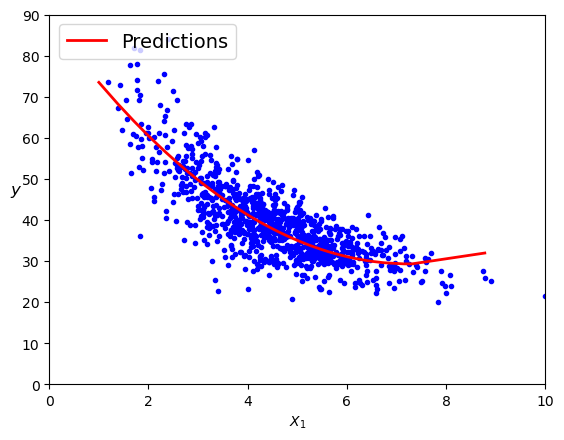

In [34]:
order = np.argsort(X_test.values.ravel())

sortedXPoly = X_test.values.ravel()[order]
sortedYPoly = y_test.values.ravel()[order]
sorted_predict_poly = y_Poly[order]

plt.plot(X, y, "b.")
plt.plot(sortedXPoly, sorted_predict_poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=14);
plt.axis([0, 10, 0, 90]);

In [35]:
# Ecuación del modelo - Polinomial
print('PLR Eq: y =', PLR.coef_[1],'x2 +', PLR.coef_[0],'x +', PLR.intercept_)

PLR Eq: y = 1.1313609537119216 x2 + -16.406381017212386 x + 88.80179909112496


In [36]:
MAE_PLR = mean_absolute_error(y_test,y_Poly)
Model_Indicators.append(["PLR","MAE",MAE_PLR])

RMSE_PLR = mean_squared_error(y_test,y_Poly)
Model_Indicators.append(["PLR","RMSE",RMSE_PLR])

r2_PLR = r2_score(y_test,y_Poly)
Model_Indicators.append(["PLR","r2",r2_PLR])

print('Error Medio Absoluto (MAE):', MAE_PLR)
print('Error Medio Cuadrado (RMSE):', RMSE_PLR)
print('r2:', r2_PLR)

Error Medio Absoluto (MAE): 4.3833025759681075
Error Medio Cuadrado (RMSE): 34.021221050567426
r2: 0.7385501224942537


**Ridge y Lasso**

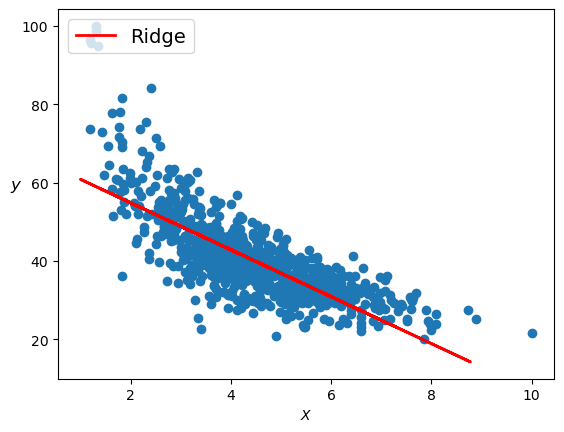

In [37]:
MRidge = Ridge(alpha=1.0,fit_intercept=True)
MRidge.fit(X_train, y_train)

X_Ridge = X_test
y_Ridge = MRidge.predict(X_Ridge)

plt.scatter(X_train, y_train)
plt.plot(X_Ridge, y_Ridge, "r-", linewidth=2, label="Ridge")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=14);

In [38]:
# Ecuación del modelo - RIDGE
print('RIG Eq: y =', MRidge.coef_,'x +', MRidge.intercept_)

RIG Eq: y = [-5.98505893] x + 66.81965008652344


In [39]:
MAE_RIG = mean_absolute_error(y_test,y_Ridge)
Model_Indicators.append(["RIG","MAE",MAE_RIG])

RMSE_RIG = mean_squared_error(y_test,y_Ridge)
Model_Indicators.append(["RIG","RMSE",RMSE_RIG])

r2_RIG = r2_score(y_test,y_Ridge)
Model_Indicators.append(["RIG","r2",r2_RIG])

print('Error Medio Absoluto (MAE):', MAE_RIG)
print('Error Medio Cuadrado (RMSE):', RMSE_RIG)
print('r2:', r2_RIG)

Error Medio Absoluto (MAE): 5.014112691100099
Error Medio Cuadrado (RMSE): 50.54337500000185
r2: 0.611578926493084


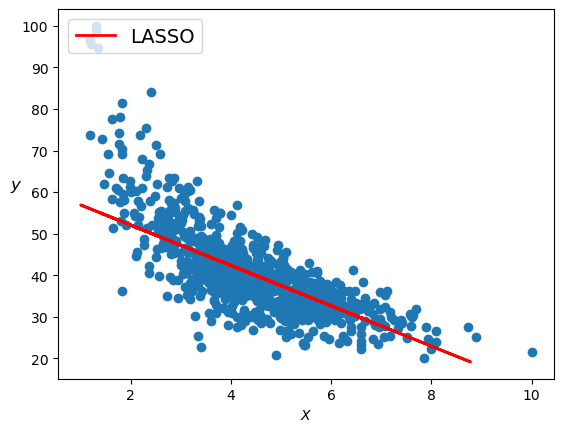

In [40]:
MLasso = Lasso(alpha=2.0,fit_intercept=True)
MLasso.fit(X_train, y_train)

X_Lasso = X_test
y_Lasso = MLasso.predict(X_Lasso)

plt.scatter(X_train, y_train)
plt.plot(X_Lasso, y_Lasso, "r-", linewidth=2, label="LASSO")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=14);

In [41]:
# Ecuación del modelo - LASSO
print('LAS Eq: y =', MLasso.coef_,'x +', MLasso.intercept_)

LAS Eq: y = [-4.85558603] x + 61.76668492487158


In [42]:
MAE_LAS = mean_absolute_error(y_test,y_Lasso)
Model_Indicators.append(["LAS","MAE",MAE_LAS])

RMSE_LAS = mean_squared_error(y_test,y_Lasso)
Model_Indicators.append(["LAS","RMSE",RMSE_LAS])

r2_LAS = r2_score(y_test,y_Lasso)
Model_Indicators.append(["LAS","r2",r2_LAS])

print('Error Medio Absoluto (MAE):', MAE_LAS)
print('Error Medio Cuadrado (RMSE):', RMSE_LAS)
print('r2:', r2_LAS)

Error Medio Absoluto (MAE): 5.18124326706215
Error Medio Cuadrado (RMSE): 54.84745061929168
r2: 0.5785025109885904


# Comparación Modelos

In [43]:
print(Model_Indicators)

[['SLR', 'MAE', 5.013587781954963], ['SLR', 'RMSE', 50.53735951137563], ['SLR', 'r2', 0.6116251549562579], ['PLR', 'MAE', 4.3833025759681075], ['PLR', 'RMSE', 34.021221050567426], ['PLR', 'r2', 0.7385501224942537], ['RIG', 'MAE', 5.014112691100099], ['RIG', 'RMSE', 50.54337500000185], ['RIG', 'r2', 0.611578926493084], ['LAS', 'MAE', 5.18124326706215], ['LAS', 'RMSE', 54.84745061929168], ['LAS', 'r2', 0.5785025109885904]]


In [44]:
ModelsName=[]
ModelsName.append('SLR')
ModelsName.append('PLR')
ModelsName.append('RIG')
ModelsName.append('LAS')

IndicatorName=[]
IndicatorName.append('MAE')
IndicatorName.append('RMSE')
IndicatorName.append('r2')

Gráfico: MAE


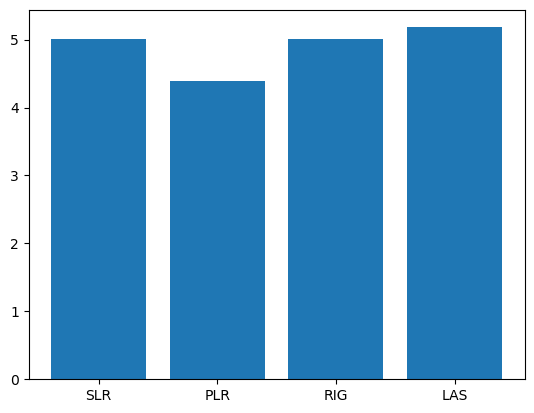

Gráfico: RMSE


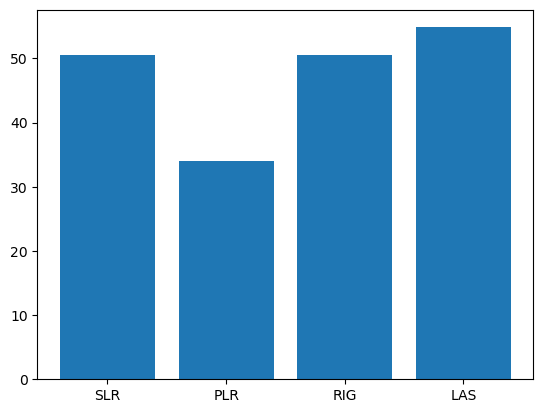

Gráfico: r2


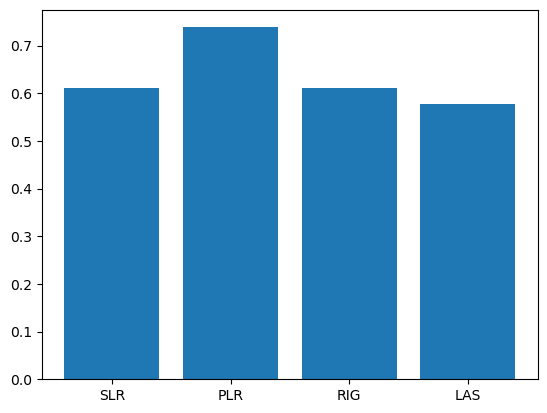

In [45]:
for Indicator in IndicatorName:
    IndicatorVal=[]
    print("Gráfico: "+Indicator)
    for line in Model_Indicators:
        if line[1] == Indicator:
            IndicatorVal.append(line[2])
    plt.bar(ModelsName, IndicatorVal)
    plt.show()
        

In [46]:
ResLineal=y_Lineal - y_test
ResPoly= y_Poly - y_test
ResRidge=y_Ridge - y_test
ResLasso=y_Lasso - y_test
Res= [ResLineal,ResPoly,ResRidge,ResLasso]

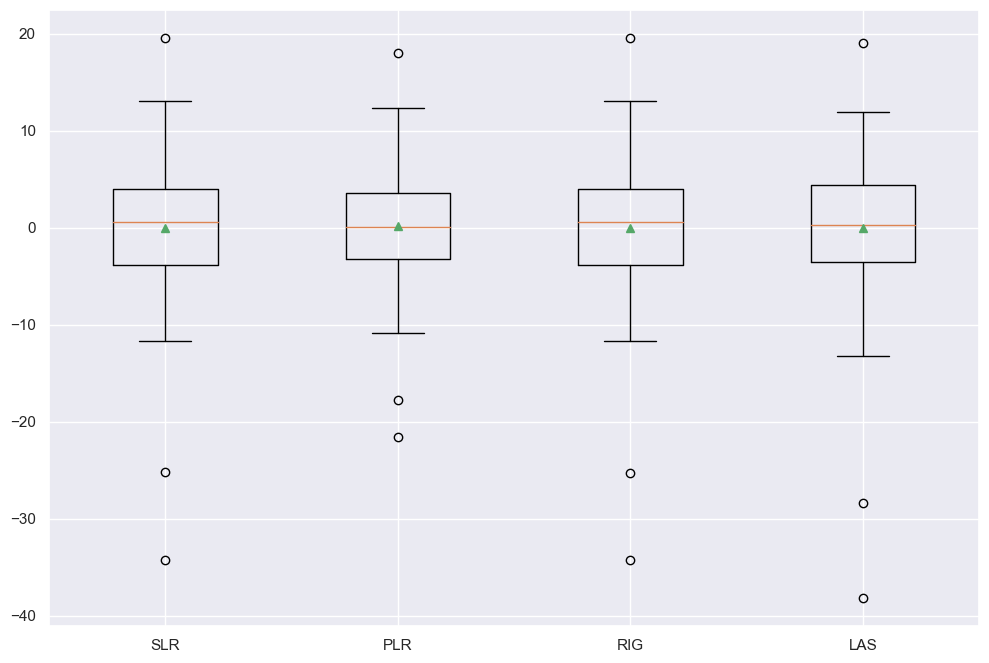

In [47]:
sns.set(rc={'figure.figsize':(12,8)})

plt.boxplot(Res, labels=ModelsName, showmeans=True)
plt.show()